<a href="https://colab.research.google.com/github/jeffreyfeng99/BME252/blob/master/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Libaries

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from math import e

### Hill Type Model

In [0]:
class HillTypeModel:
    """
    Hill-type model based on Millard et al. (2013) undamped model, with simplified force-length
    and force-velocity curves.
    """

    def __init__(self, max_isometric_force, resting_muscle_length, resting_tendon_length):
        self.f0 = max_isometric_force
        self.resting_muscle_length = resting_muscle_length
        self.resting_tendon_length = resting_tendon_length
        self.positive_velocity_slope = 0.1 # slope of lengthening part of force-velocity curve

    def get_muscle_velocity(self, muscle_length, total_length, activation):
        """
        :param muscle_length: length of "muscle", i.e. contractile element (m)
        :param total_length: total length of muscle-tendon (m)
        :param activation: fraction max activation (between 0 and 1)
        :return: lengthening velocity of muscle (m/s)
        """

        norm_muscle_length = muscle_length / self.resting_muscle_length
        norm_tendon_length = (total_length - muscle_length) / self.resting_tendon_length

        force_tendon = self.force_length_series(norm_tendon_length)
        force_parallel_elastic = self.force_length_parallel(norm_muscle_length)
        force_length_gain = self.force_length_contractile(norm_muscle_length)
        force_velocity_gain = (force_tendon - force_parallel_elastic) / max(.01, activation * force_length_gain)
        norm_muscle_velocity = self.force_velocity_inverse(force_velocity_gain)

        return norm_muscle_velocity * self.resting_muscle_length

    def force_length_series(self, length):
        return np.maximum(0, (length-1)*20)

    def force_length_parallel(self, length):
        return (length > 1) * (1.5*length-1.5)**2

    def force_length_contractile(self, length):
        return np.exp(-(length-1)**2 / .4)

    def force_velocity(self, velocity):
        return 1 + velocity - (1-self.positive_velocity_slope)*velocity*(velocity > 0)

    def force_velocity_inverse(self, gain):
        if gain < 1:
            return (gain-1)
        else:
            return (gain-1) * (1/self.positive_velocity_slope)

    def plot_curves(self):
        plt.figure()
        length = np.linspace(0, 2, 100)
        plt.subplot(2,2,1)
        plt.plot(length, self.force_length_series(length))
        plt.title('SE')
        plt.xlabel('Normalized length')
        plt.ylabel('Normalized force')
        plt.subplot(2,2,2)
        plt.plot(length, self.force_length_parallel(length))
        plt.title('PE')
        plt.xlabel('Normalized length')
        plt.ylabel('Normalized force')
        plt.subplot(2,2,3)
        plt.plot(length, self.force_length_contractile(length))
        plt.title('CE')
        plt.xlabel('Normalized length')
        plt.ylabel('Normalized force')
        plt.subplot(2,2,4)
        velocity = np.linspace(-1, 1, 100)
        plt.plot(velocity, self.force_velocity(velocity))
        plt.title('CE')
        plt.xlabel('Normalized velocity')
        plt.ylabel('Normalized force')
        plt.tight_layout()
        plt.show()




### Activation for Hill Type

- Frequency
- Positive Pulse Width and Amplitude
- Negative Pulse Width and Amplitude
- Non-linearility coefficient
- Pulse Amplitude
- Fatigue

In [0]:
class Activation:
  '''
  Activation function that will be used on Hill-Type Muscle Model

  Impulse Interval should be a field no?
  '''
  def __init__(self, frequency, pos_width, neg_width, p_amp, n_amp, non_linearity, fatigue = None):
    '''
    frequency: Hz
    pos_width: (ms)
    neg_width: (ms)
    '''
    self.frequency = frequency
    self.pos_width = pos_width
    self.neg_width = neg_width
    self.non_linearity = non_linearity
    self.fatigue = fatigue

  def get_activation_signal(self, frequency, pos_width, neg_width, p_amp, n_amp, non_linearity):
    period = (1 * 1000)//frequency # ms

    # the activation signal can't be on or off longer than the frequency
    assert pos_width + neg_width < period

    on = p_amp * np.ones(self.pos_width)
    neg = n_amp * np.ones(self.neg_width)
    result = np.concatenate((on, neg))

    off = np.zeros(period - (pos_width + neg_width))   
    
    result = np.concatenate((result, off))
    plt.plot(result)

    activation_signal = e**(non_linearity*result)-1/(e**non_linearity-1)
    plt.plot(activation_signal)
    return activation_signal
  
  # def get_amp(self, t):

  
  # def get_fatigue(self, signal, width):



array([ 7.23253846,  7.23253846,  7.23253846,  7.23253846,  7.23253846,
        7.23253846,  7.23253846,  7.23253846,  7.23253846,  7.23253846,
        7.23253846,  7.23253846,  7.23253846,  7.23253846,  7.23253846,
        7.23253846,  7.23253846,  7.23253846,  7.23253846,  7.23253846,
        7.23253846,  7.23253846,  7.23253846,  7.23253846,  7.23253846,
        7.23253846,  7.23253846,  7.23253846,  7.23253846,  7.23253846,
        7.23253846,  7.23253846,  7.23253846,  7.23253846,  7.23253846,
        7.23253846,  7.23253846,  7.23253846,  7.23253846,  7.23253846,
        7.23253846,  7.23253846,  7.23253846,  7.23253846,  7.23253846,
        7.23253846,  7.23253846,  7.23253846,  7.23253846,  7.23253846,
       -0.15647224, -0.15647224, -0.15647224, -0.15647224, -0.15647224,
       -0.15647224, -0.15647224, -0.15647224, -0.15647224, -0.15647224,
       -0.15647224, -0.15647224, -0.15647224, -0.15647224, -0.15647224,
       -0.15647224, -0.15647224, -0.15647224, -0.15647224, -0.15

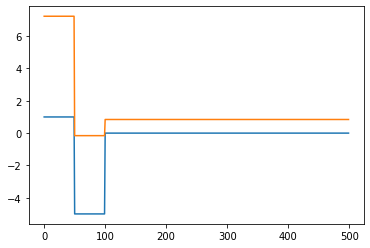

In [0]:
frequency, pos_width, neg_width, p_amp, n_amp, non_linearity = 2, 50, 50, 1, -5, 2
a = Activation(frequency, pos_width, neg_width, p_amp, n_amp, non_linearity)
a.get_activation_signal(frequency, pos_width, neg_width, p_amp, n_amp, non_linearity)

In [0]:
resting_muscle_length = .3
resting_tendon_length = .1
max_isometric_force = 1000
muscle = HillTypeModel(max_isometric_force, resting_muscle_length, resting_tendon_length)
muscle.plot_curves()

total_length = resting_muscle_length + resting_tendon_length


def f(t, x):
    activation = 1
    return muscle.get_muscle_velocity(x, total_length, activation)


sol = solve_ivp(f, [0, 1], [resting_muscle_length], max_step=.01, rtol=1e-5, atol=1e-8)

plt.figure()
plt.subplot(1,2,1)
plt.plot(sol.t, sol.y.T)
plt.xlabel('Time (s)')
plt.ylabel('Normalized CE length')
plt.subplot(1,2,2)
plt.plot(sol.t, muscle.force_length_series((total_length - sol.y.T)/resting_tendon_length))
plt.xlabel('Time (s)')
plt.ylabel('Normalized Tension')
plt.tight_layout()
plt.show()

### Musculoskeletal Model

![alt text](https://www.overleaf.com/project/5e363d20b88ae3000145ffb8/file/5e569722d7c16900017aeac0)

**State Equations**

\begin{equation}
     \vec{x} =
     \begin{bmatrix}
     \theta \\
     \dot{\theta} \\
     L_{TA} \\
     L_{Sol}
     \end{bmatrix}
 \end{equation}

In [0]:
def soleus_length(theta):
    """
    :param theta: body angle (up from prone horizontal)
    :return: soleus length
    """
    rotation = [[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]]
    origin = np.dot(rotation, [.3, .03])
    insertion = [-.05, -.02]
    difference = origin - insertion
    return np.sqrt(difference[0]**2 + difference[1]**2)

In [0]:
def tibialis_length(theta):
    """
    :param theta: body angle (up from prone horizontal)
    :return: tibialis anterior length
    """
    rotation = [[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]]
    origin = np.dot(rotation, [.3, -.03])
    insertion = [.06, -.03]
    difference = origin - insertion
    return np.sqrt(difference[0]**2 + difference[1]**2)

In [0]:
def gravity_moment(theta):
    """
    :param theta: angle of body segment (up from prone)
    :return: moment about ankle due to force of gravity on body
    """
    mass = 75 # body mass (kg; excluding feet)
    centre_of_mass_distance = 1 # distance from ankle to body segment centre of mass (m)
    g = 9.81 # acceleration of gravity
    return mass * g * centre_of_mass_distance * np.sin(theta - np.pi / 2)

In [0]:
def dynamics(x, soleus, tibialis, control):
    """
    :param x: state vector (ankle angle, angular velocity, soleus normalized CE length, TA normalized CE length)
    :param soleus: soleus muscle (HillTypeModel)
    :param tibialis: tibialis anterior muscle (HillTypeModel)
    :param control: True if balance should be controlled
    :return: derivative of state vector
    """

    # constants
    inertia_ankle = 90.0
    soleus_moment_arm = .05
    tibialis_moment_arm = .03

    Kp_s = 2.05
    Kd_s = 0.83

    Kp_ta = 30
    Kd_ta = 10

    activation_s_static = 0.05
    activation_ta_static = 0.5


    if (control == 0): #Uncontrolled
      activation_s = 0.05
      activation_ta = 0.4  

    elif (control == 1): #Simple constants controller
      if x[1] > 0:
        activation_s = 0.01
        activation_ta = 0.6
      else:
        activation_s = 0.02
        activation_ta = 0.2

    elif(control == 2): #PD controller

      error = ((np.pi/2) - x[0]) #Calculates error 

      if(error > 0): # Leaning Forward (We want Soleus on)
        activation_s = max(0,min(1,activation_s_static + error * Kp_s - x[1] * Kd_s))
        activation_ta = min((error * Kp_ta/8), activation_ta_static/8)
      elif(error <= 0): # Leaning Backwards (We want TA on)
        activation_s = min((-1* error *	Kp_s/8), activation_s_static/8) 
        activation_ta =max(0,min(1,activation_ta_static + -1* error * Kp_ta + x[1] * Kd_ta))
      else: # Standing straight up
        activation_s = activation_s_static
        activation_ta = activation_ta_static
    else:
      activation_s = 0.05
      activation_ta = 0.4 

    # use predefined functions to calculate total muscle lengths as a function of theta
    soleus_length_val = soleus_length(x[0])
    tibialis_length_val = tibialis_length(x[0])

    # solve for normalized tendon length
    norm_soleus_tendon_length = soleus.norm_tendon_length(soleus_length_val,x[2])
    norm_tibialis_tendon_length = tibialis.norm_tendon_length(tibialis_length_val,x[3])

    # derivative of ankle angle is angular velocity
    x_0 = x[1]

    # calculate moments as defined by balance model mechanics 
    tau_s =  soleus_moment_arm * soleus.get_force(soleus_length_val, x[2])
    tau_ta = tibialis_moment_arm * tibialis.get_force(tibialis_length_val, x[3])
    gravity_moment_val = gravity_moment(x[0])


    
    # # derivative of angular velocity is angular acceleration
    # x_1 = (tau_s - tau_ta + gravity_moment_val)/inertia_ankle

    # # derivative of normalized CE lengths is normalized velocity
    # x_2 = get_velocity(activation_s, x[2], norm_soleus_tendon_length)
    # x_3 = get_velocity(activation_ta, x[3], norm_tibialis_tendon_length)

    # return as a vector
    return [x_0, x_1, x_2, x_3]




In [0]:
def simulate(control, T):
    """
    Runs a simulation of the model and plots results.
    :param control: True if balance should be controlled
    :param T: total time to simulate, in seconds
    """
    rest_length_soleus = soleus_length(np.pi/2)
    rest_length_tibialis = tibialis_length(np.pi/2)

    soleus = HillTypeMuscle(16000, .6*rest_length_soleus, .4*rest_length_soleus)
    tibialis = HillTypeMuscle(2000, .6*rest_length_tibialis, .4*rest_length_tibialis)

    def g(t, x):
        return dynamics(x, soleus, tibialis, control)

    sol = solve_ivp(f, [0, T], [np.pi/2-0.001, 0, 1, 1], rtol=1e-5, atol=1e-8)

    time = sol.t
    theta = sol.y[0,:]
    soleus_norm_length_muscle = sol.y[2,:]
    tibialis_norm_length_muscle = sol.y[3,:]

    soleus_moment_arm = .05
    tibialis_moment_arm = .03
    soleus_moment = []
    tibialis_moment = []
    for th, ls, lt in zip(theta, soleus_norm_length_muscle, tibialis_norm_length_muscle):
        soleus_moment.append(soleus_moment_arm * soleus.get_force(soleus_length(th), ls))
        tibialis_moment.append(-tibialis_moment_arm * tibialis.get_force(tibialis_length(th), lt))

    plt.figure()
    plt.subplot(2,1,1)
    plt.plot(time,sol.y[0,:])
    plt.plot(time, np.full((len(time),1),np.pi/2))
    plt.legend(('Body angle', 'pi/2 rad'))
    plt.ylabel('Body angle (rad)')
    plt.subplot(2,1,2)
    plt.plot(time, soleus_moment, 'r')
    plt.plot(time, tibialis_moment, 'g')
    plt.plot(time, gravity_moment(sol.y[0,:]), 'k')
    plt.legend(('soleus', 'tibialis', 'gravity'))
    plt.xlabel('Time (s)')
    plt.ylabel('Torques (Nm)')
    plt.tight_layout()
    plt.show()